In [1]:
# Denetimsiz Öğrenme

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y_true = make_blobs(n_samples=300, centers=4 , random_state=42)

In [5]:
import matplotlib.pyplot as plt

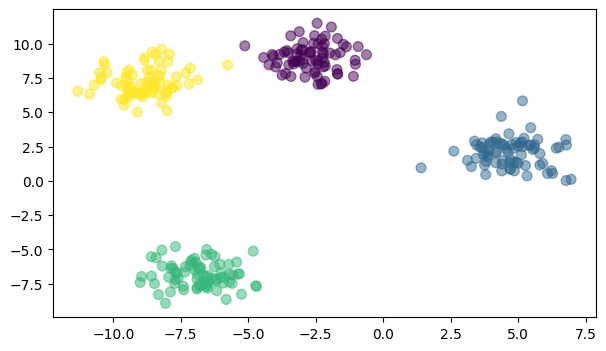

In [11]:
plt.figure(figsize=(7,4))
plt.scatter(X[:,0] ,X[:,1],c=y_true , s=50 , alpha=0.5) # X[:,0] -> :Tüm satırları al -> [0] 0.sütunu al

In [12]:
import pandas as pd 

In [13]:
df = pd.read_csv("Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [16]:
X = df [ [ "Annual Income (k$)" , "Spending Score (1-100)"] ].values #Values df->arraye çevir

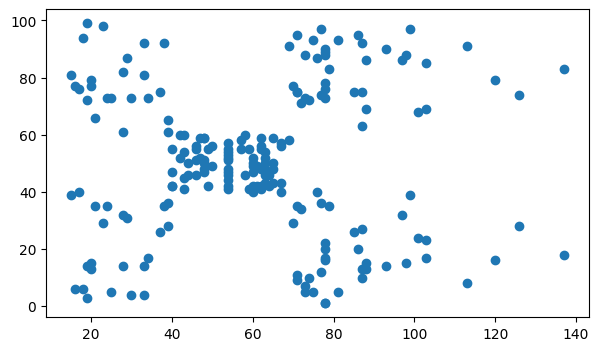

In [17]:
# K-Means 
plt.figure(figsize=(7,4))
plt.scatter(X[:,0] ,X[:,1])

In [20]:
from sklearn.cluster import KMeans

In [34]:
model = KMeans(n_clusters=5 , random_state=42)
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [35]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [36]:
y = model.predict(X)

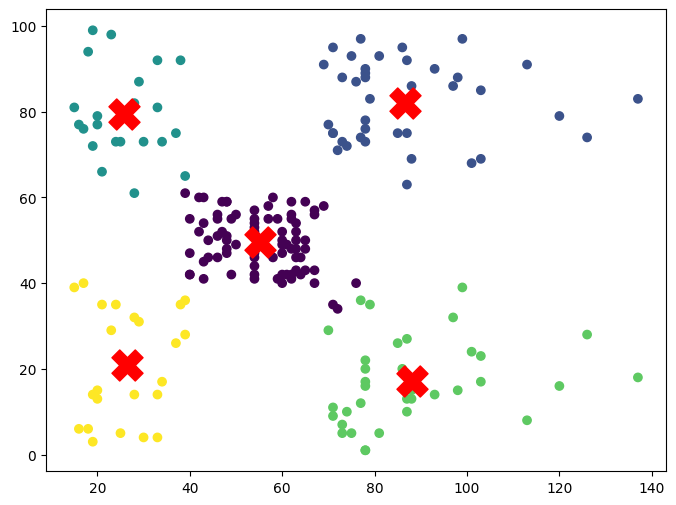

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0] , model.cluster_centers_[:,1] , c="red" , s=500 , marker="X")
plt.show()

In [38]:
# Dirsek (Elbow) Methodu 

In [39]:
# inertia => parametre - her noktanın kendi merkezine uzaklığının kareleri toplamı.Düşük değer daha iyi değer
model.inertia_

44448.45544793371

In [40]:
def elbow_method():
    inertias = [] 
    for k in range (2,11):
        model =KMeans(n_clusters=k ,random_state=42)
        model.fit(X)
        inertias.append(model.inertia_)
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11), inertias)

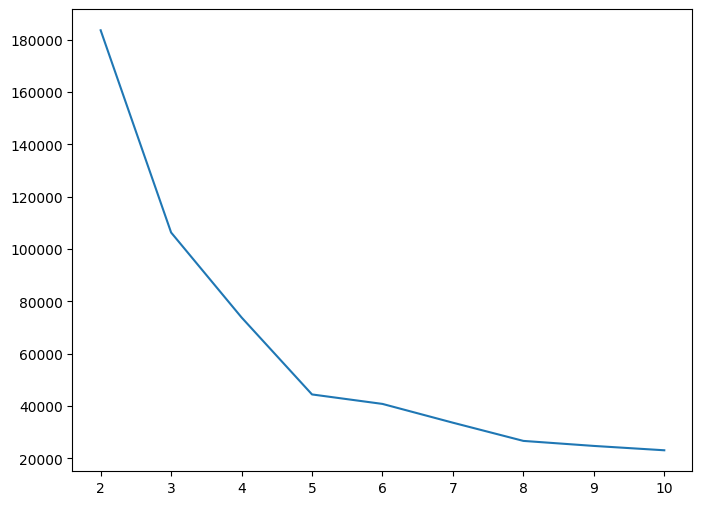

In [41]:
elbow_method()
# dirsek methoduna göre en iyi n_cluster = 5

In [42]:
# Silhouette Method -> Kendi merkezine yakınlık? Diğer merkezlere uzaklık?

In [43]:
from sklearn.metrics import silhouette_score

In [46]:
def silh_method():
    scores =[]
    for k in range (2,11):
        kmeans =KMeans(n_clusters=k , random_state=42)
        y= kmeans.fit_predict(X)
        scores.append ( silhouette_score(X,y))
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11) , scores ) 
    plt.show()

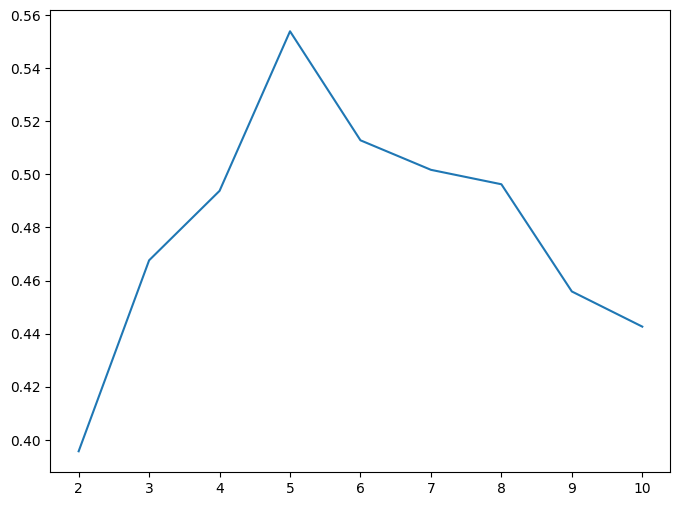

In [47]:
silh_method()

In [48]:
# 1. ödev => Davies Bouldin Method Araştırılıp uygulanacak
# 2. ödev => Scaling (Özellik Ölçekleme) nedir? Nasıl yapılır? Araştırılıp markdown dosyası oluşturalım
# DBSCAN -> Algoritması sonraki ders.